In [1]:
print("Hello Julia")

Hello Julia

In [2]:
pwd()

"/Volumes/GoogleDrive/My Drive/UNOMIC/JuliaTesting/Hands-On-Computer-Vision-with-Julia"

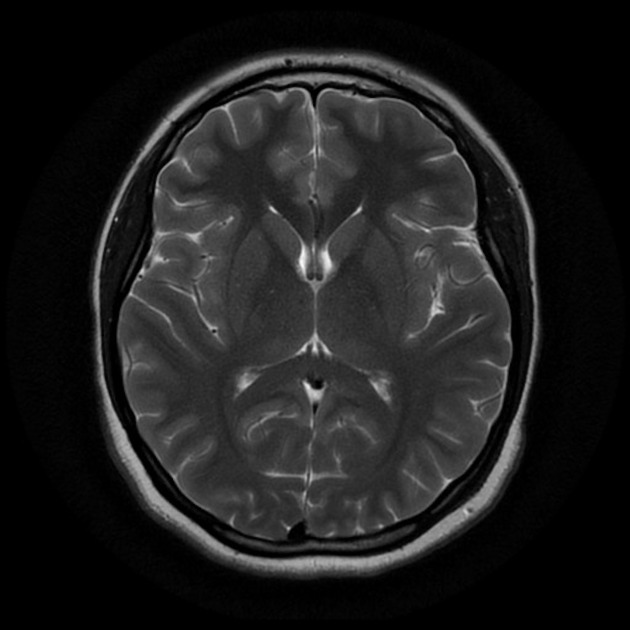

In [3]:
using Images, FileIO
ImgPath = "./archive/no/1.jpeg"

if isfile(ImgPath)
    sampleImage = load(ImgPath)
else
    print("ERROR: Image not found")
end



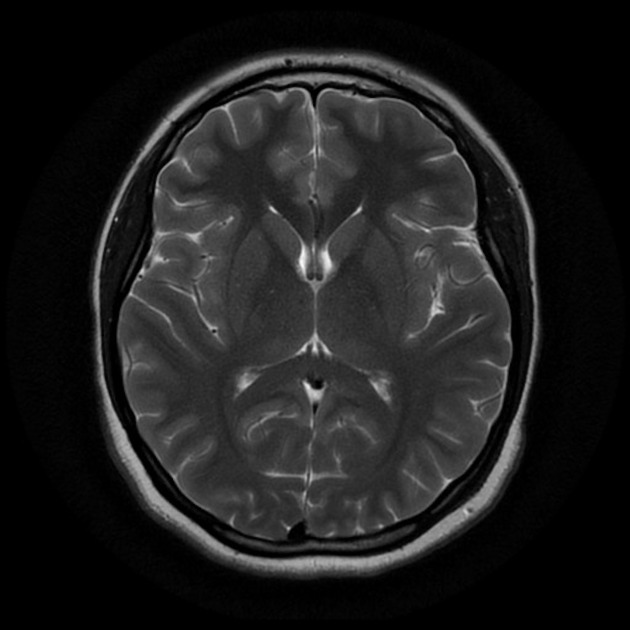

In [5]:
using ImageView

img = load(ImgPath)
# imshow(img)

In [6]:
using Images, ImageMetadata, TestImages, ImageView


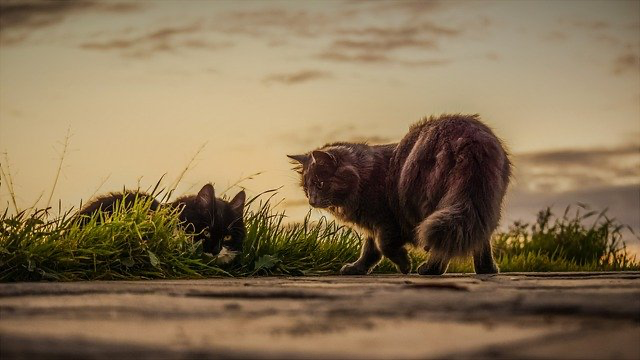

In [7]:
image_url = "https://cdn.pixabay.com/photo/2018/01/04/18/58/cats-3061372_640.jpg?attachment"
downloaded_image_path = download(image_url)
downloaded_image = load(downloaded_image_path)

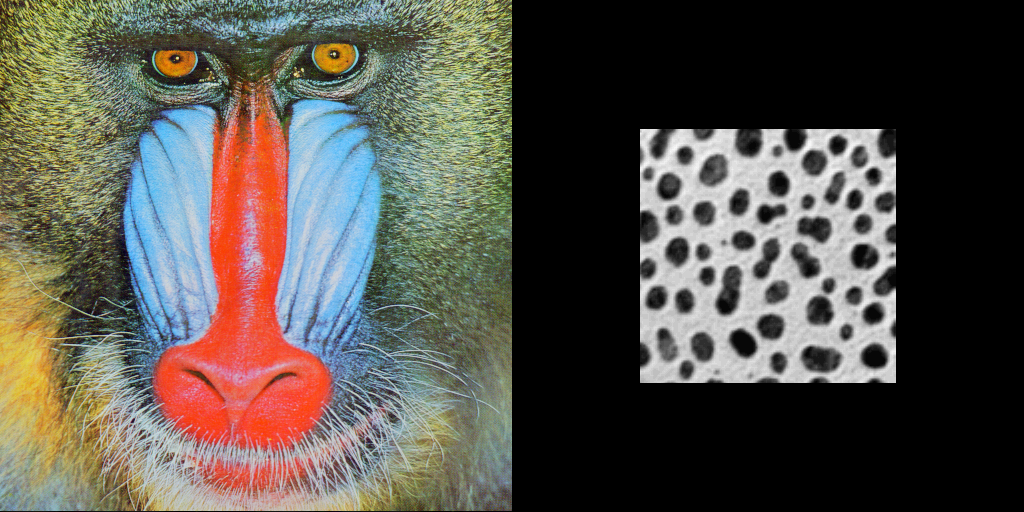

In [8]:
img1 = testimage("mandrill")
img2 = testimage("blobs")
mosaicview(img1, img2; nrow = 1)

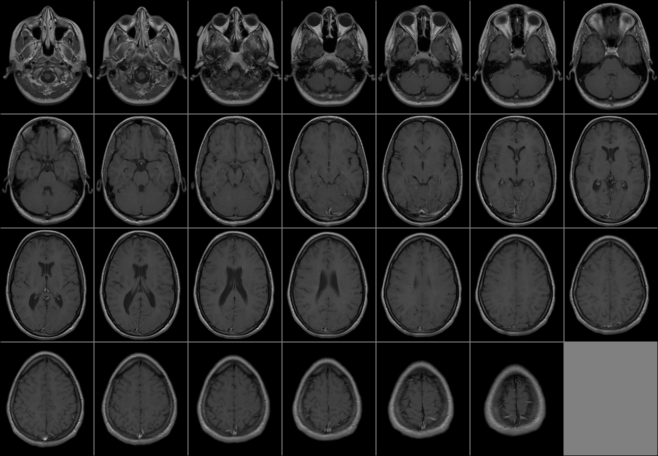

In [9]:
img = testimage("mri-stack") # 226×186×27 Gray image
mosaicview(img; fillvalue=0.5, npad=2, ncol=7, rowmajor=true)

In [10]:
img = rand(4, 3);
# generate an image that starts black in the upper left
# and gets bright in the lower right
img = Array(reshape(range(0,stop=1,length=10^4), 100, 100));
# make a copy
img_c = img[51:70, 21:70]; # red
# make a view
img_v = @view img[16:35, 41:90] # blue

20×50 view(::Matrix{Float64}, 16:35, 41:90) with eltype Float64:
 0.40154  0.411541  0.421542  0.431543  …  0.871587  0.881588  0.891589
 0.40164  0.411641  0.421642  0.431643     0.871687  0.881688  0.891689
 0.40174  0.411741  0.421742  0.431743     0.871787  0.881788  0.891789
 0.40184  0.411841  0.421842  0.431843     0.871887  0.881888  0.891889
 0.40194  0.411941  0.421942  0.431943     0.871987  0.881988  0.891989
 0.40204  0.412041  0.422042  0.432043  …  0.872087  0.882088  0.892089
 0.40214  0.412141  0.422142  0.432143     0.872187  0.882188  0.892189
 0.40224  0.412241  0.422242  0.432243     0.872287  0.882288  0.892289
 0.40234  0.412341  0.422342  0.432343     0.872387  0.882388  0.892389
 0.40244  0.412441  0.422442  0.432443     0.872487  0.882488  0.892489
 0.40254  0.412541  0.422542  0.432543  …  0.872587  0.882588  0.892589
 0.40264  0.412641  0.422642  0.432643     0.872687  0.882688  0.892689
 0.40274  0.412741  0.422742  0.432743     0.872787  0.882788  0.892789

In [2]:
using Images, TestImages, ImageView
img = testimage("mri");
println(summary(img))
# s = load(img)
horiz = img[Axis{:S}(25)];
imshow(img)

3-dimensional AxisArray{Gray{N0f8},3,...} with axes:
    :P, 0:1:225
    :R, 0:1:185
    :S, 0:5:130
And data, a 226×186×27 Array{Gray{N0f8},3} with eltype Gray{N0f8}


Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>55: "map(clim-mapped image, inpu…
  "annotations" => 4: "input-3" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 3: "CLim" = CLim{N0f8}(0.0, 0.851) CLim{N0f8} 

In [1]:
using ImageView
imshow(img)

LoadError: UndefVarError: img not defined

In [24]:
using Images, ImageView

directory_path = "./archive/no/";
directory_files = readdir(directory_path);
# print(directory_files)
directory_images = filter(x -> occursin(r"\.(jpg|png|gif){1}$"i, x), directory_files);

# print(directory_images)

for image_name in directory_images
    image_path = joinpath(directory_path, image_name)
    image = load(image_path)
    # imshow(image)
    # sleep(0.5)
    print(image_path)
end

./archive/no/10 no.jpg./archive/no/11 no.jpg./archive/no/12 no.jpg./archive/no/13 no.jpg./archive/no/14 no.jpg./archive/no/15 no.jpg./archive/no/17 no.jpg./archive/no/18 no.jpg./archive/no/19 no.jpg./archive/no/20 no.jpg./archive/no/21 no.jpg./archive/no/22 no.jpg./archive/no/23 no.jpg./archive/no/24 no.jpg./archive/no/25 no.jpg./archive/no/26 no.jpg./archive/no/27 no.jpg./archive/no/28 no.jpg./archive/no/29 no.jpg./archive/no/3 no.jpg./archive/no/30 no.jpg./archive/no/31 no.jpg./archive/no/32 no.jpg./archive/no/33 no.jpg./archive/no/34 no.jpg./archive/no/35 no.jpg./archive/no/36 no.jpg./archive/no/37 no.jpg./archive/no/38 no.jpg./archive/no/39 no.jpg./archive/no/4 no.jpg./archive/no/40 no.jpg./archive/no/41 no.jpg./archive/no/42 no.jpg./archive/no/43 no.jpg./archive/no/44no.jpg./archive/no/45 no.jpg./archive/no/46 no.jpg./archive/no/47 no.jpg./archive/no/49 no.jpg./archive/no/5 no.jpg./archive/no/50 no.jpg./archive/no/6 no.jpg./archive/no/7 no.jpg./archive/no/8 no.jpg./archive/no/9 no

In [30]:
using Images, ImageView
si = load("horse.jpg");
print(size(si))
ci = si[10:100, 10:100]; #creat new object
# imshow(ci)

refImg = view(si, 10:100, 10:100);
# imshow(refImg)

resized_image = imresize(si, (500, 500));
imshow(resized_image);;



(240, 360)

In [37]:
using Images
source_image = load("horse.jpg");
scale_percentage = 0.6
new_size = trunc.(Int, size(source_image) .* scale_percentage)
resized_image = imresize(source_image, new_size)
# mosaicview(source_image, resized_image, nrow = 1);
imshow( resized_image);

In [42]:
using Images, CoordinateTransformations
img = load("horse.jpg");
tfm = imrotate(img, π / 4);
# img = warp(img, tfm);
imshow(tfm)

Dict{String, Any} with 4 entries:
  "gui"         => Dict{String, Any}("window"=>GtkWindowLeaf(name="", parent, w…
  "roi"         => Dict{String, Any}("redraw"=>484: "map(clim-mapped image, inp…
  "annotations" => 437: "input-321" = Dict{UInt64, Any}() Dict{UInt64, Any} 
  "clim"        => 436: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …